<a href="https://colab.research.google.com/github/agustinparada/Fisica_Computacional_I/blob/master/Actividad_10/Actividad10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 10***

José Agustín Parada Peralta. 219209388.

Departamento de Física

Universidad de Sonora

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_bvp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Para la resolución de la ecuación de calor, se utilizan métodos afines de las diferencias finitas. Este método, surge de considerar los polinomios de Taylor centrados en puntos $x_0$ y pasos pequeños $h$ como para despreciar los términos con potencias mayores que 1 de $h$.

$$ u(x_0+h) \approx u(x_0) + \frac{h}{1!}u'(x_0)+O(h^2) $$
Despejando $u'(x_0)$:

$$ u'(x_0)\approx \frac{u(x_0+h)-u(x_0)}{h} $$
Lo que se conoce como diferencias finitas hacia enfrente.
Similarmente, podemos encontrar una expresión para $u'(x_0)$ utilizando $u(x_0-h)$:

$$ u'(x_0)\approx \frac{u(x_0)-u(x_0-h)}{h} $$
Lo que es diferencias finitas hacia atrás.
Promedindo las ecuaciones anteriores, terminamos con:

$$ u'(x_0)\approx \frac{u(x_0+h)-u(x_0-h)}{2h} $$

Podemos obtener un resultado similar para una derivada de orden 2, mediante diferencias finitas hacia enfrente:

$$ u''(x_0)\approx\frac{u'(x_0+h)-u'(x_0)}{h} $$

Podemos ver a $u'(x_0+h)$ mediante diferencias finitas hacia atrás, y a $u'(x_0)$ hacia atrás:

\begin{align*}
u'(x_0+h) &\approx \frac{u(x_0+h)-u(x_0)}{h}\\
u'(x_0) &\approx \frac{u(x_0)-u(x_0-h)}{h}
\end{align*}

Sustituyendo, obtenemos:

$$ u''(x_0)\approx \frac{u(x_0+h)-2u(x_0)+u(x_0-h)}{h^2} $$

***Ejemplo***

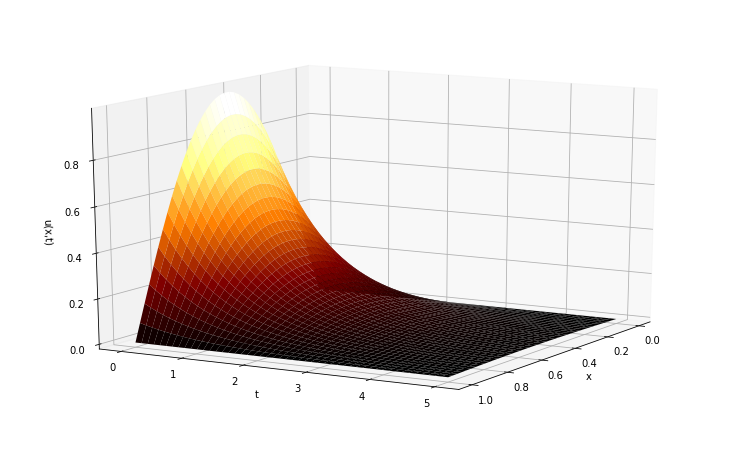

In [ ]:
# Declaramos la función de la derivada temporal, utilizando la expresión de diferencias finitas de segundo orden
# de manera que se barren primeramente el eje x y luego se integra respecto del tiempo.
def func(u, t, x, N, h):
  dudt=np.zeros(x.shape)
  kappa=0.1

  dudt[0]=dudt[-1]=0
  for k in range(1,N-1):
    dudt[k]=kappa*((u[k+1]-2*u[k]+u[k-1])/h**2)
  return dudt

# Parámetros
N=40 #Número de pasos espaciales
a=0 #Lim. Inferior
b=1 #Lim. Superior
# Tiempos inicial y final
ti=0.0 
tf=5.0

# Espaciamiento en x y matrices de valores de espacio y tiempo
h=(b-a)/(N-1)
x=np.linspace(a,b,N)
t=np.linspace(ti,tf,50)

# Condiciones iniciales
x0=np.sin(np.pi*x)
x0[x0<0]=0

# Solución de la ecuación de calor.
sol=odeint(func,x0,t,args=(x,N,h))

#Graficación de la solución en el espacio.
fig=plt.figure(figsize=(13,8))
ax = fig.add_subplot(111,projection='3d')
sx, st = np.meshgrid(x,t)

ax.plot_surface(sx,st,sol,cmap='afmhot',rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(elev=15,azim=30)
plt.show()

# ***Problema 1***
***Inciso (a)***

Tenemos una barrera de longitud $L=10$, coeficiente de difusión $\kappa=100$.

La condición inicial $u(x,0)=0$. Tenemos las condiciones de la frontera:
$$ u(0,t)=10;\; u(L,t)=0 $$

Resolveremos la ecuación de calor utilizando el método de diferencias finitas. Específicamente, centrado en el espacio (segundo orden) y adelantado en el tiempo. Lo que es:

$$ \frac{u(x,t+k)-u(x,t)}{k}= \kappa \frac{u(x+h,t)-2u(x,t)+u(x-h,t)}{h^2}+O(h^3,k^2) $$
Donde $k=\Delta t;\; h=\Delta x$

Despejamos $u(x,t+k)$:

$$ u(x,t+k)-u(x,t) = \kappa \frac{k}{h^2}(u(x+h,t)-2u(x,t)+u(x-h,t))$$

Denotemos:

\begin{align*}
u_h^{new} &= u(x,t+k) \\
u_h &= u(x,t) \\
u_{h+1} & = u(x+h,t) \\
u_{h-1} & = u(x-h,t) \\
\alpha & = \kappa \frac{k}{h^2}
\end{align*}

Con lo cual:

\begin{equation}
u_h^{new}=\alpha\ u_{h+1}+(1-2\alpha)u_h + \alpha\ u_{h-1}
\end{equation}

El método es estable y convergente solo si $\alpha = \kappa \frac{k}{h^2}\leq\frac{1}{2}=0.5$

k/h^2 < 1/2 ? 0.004624924984996999 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: The following kwargs were not used by contour: 'lw'


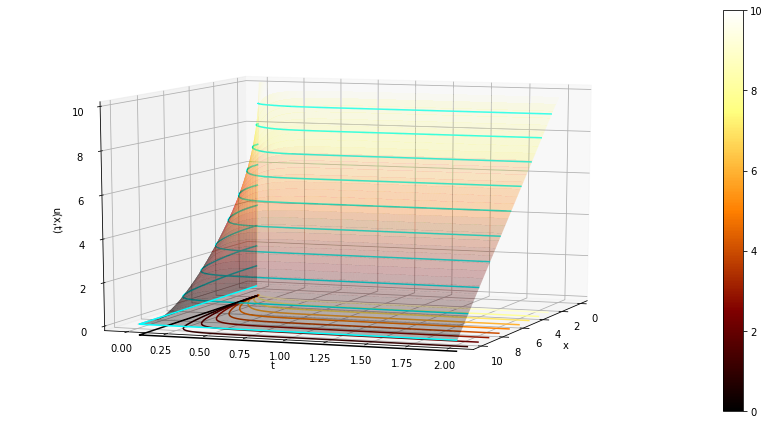

In [22]:
# Definimos los parámetros que serán necesarios

a=0.0  #Límite inferior del intervalo de x
b=10.0 #Límite superior del intervalo de x.

# Intervalo de tiempo
ti=0.0
tf=2.0

# Número de pasos
M=35   # espaciales
N=5000  # temporales

# Matriz de valores para x y t
x=np.linspace(a,b,M)
t=np.linspace(ti,tf,N)

# Distancia entre valores de x y t
h=(b-a)/(M-1)
k=(tf-ti)/(N-1)

# Criterio de convergencia
print('k/h^2 < 1/2 ?', k/h**2,'\n')
kappa=100
alpha=kappa*k/h**2

# Definimos la matriz de temperatura u
u=np.zeros((M,N))

# Definimos condiciones de frontera y valores iniciales
u[:,0]=np.zeros(x.shape)
u[0,:]=10
u[-1,:]=0

#Aplicación del método de diferencias finitas
for n in range(0,N-1):
  for m in range(1,M-1):
      u[m,n+1]=alpha*u[m+1,n]+(1-2*alpha)*u[m,n]+alpha*u[m-1,n]

# Graficación de la solución en el espacio
T, X = np.meshgrid(t,x)

fig=plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X,T,u,cmap='afmhot',rstride=1,cstride=1,alpha=0.3)

ax.contour(X,T,u,10,lw=1,colors='cyan',linestyles='solid')
ax.contour(X,T,u,10,lw=1,cmap='afmhot',linestyles='solid',offset=-0.5)

# Escala de temperaturas
m=cm.ScalarMappable(cmap='afmhot')
m.set_array(u)
plt.colorbar(m)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(elev=10,azim=20)
plt.tight_layout()
plt.show()

***Iniciso (b)***

Ahora se tiene una barra de longitud $L=10$, coeficiente de difusión $\kappa = 0.25$.

Condición inicial: $u(x,0)=20$.

Condiciones a la frontera:
\begin{align*}
u(0,t) &= 20+10\sin{\frac{\pi}{12}t}\\
u(L,t) &= 20
\end{align*}

Se da un intervalo de tiempo: $t\in [0,48]$.

Para la resolución, se utilizará el método de diferencias finitas hacia delante en el tiempo y centrados en el espacio:

\begin{equation}
u_h^{new}=\alpha\ u_{h+1}+(1-2\alpha)u_h + \alpha\ u_{h-1}
\end{equation}

k/h^2 < 1/2 ? 0.334242848569714 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: The following kwargs were not used by contour: 'lw'


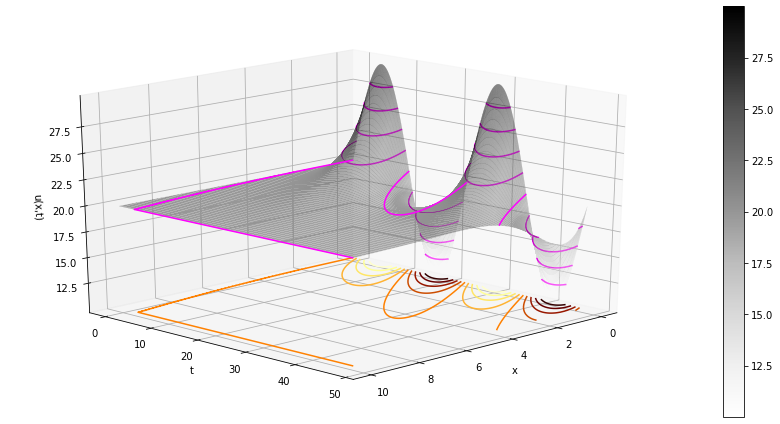

In [34]:
# Definimos parámetros necesarios
# Intervalo de x
a=0.0  
b=10.0

# Intervalo de t
ti=0.0
tf=48.0

# Número de pasos
M=60   # espaciales
N=5000  # temporales

# Matrices de valores de x y t
x=np.linspace(a,b,M)
t=np.linspace(ti,tf,N)

# Distancia entre valores de x y t
h=(b-a)/(M-1)
k=(tf-ti)/(N-1)

# Criterio de convergencia y estabilidad del método
print('k/h^2 < 1/2 ?', k/h**2,'\n')
kappa=0.25
alpha=kappa*k/h**2

# Definimos condiciones de frontera y valores iniciales
u=np.zeros((M,N))
u[:,0]=np.zeros(x.shape)+20
u[0,:]=20+10*np.sin(np.pi*t/12)
u[-1,:]=20

#Aplicación del método de diferencias finitas
for n in range(0,N-1):
  for m in range(1,M-1):
      u[m,n+1]=alpha*u[m+1,n]+(1-2*alpha)*u[m,n]+alpha*u[m-1,n]

# Graficación de la solución en el espacio
T, X = np.meshgrid(t,x)

fig=plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X,T,u,cmap='Greys',rstride=1, cstride=1, alpha=0.5)

ax.contour(X,T,u,10,lw=1,colors='fuchsia',linestyles='solid')
ax.contour(X,T,u,10,lw=1,cmap='afmhot',linestyles='solid',offset=10)

# Escala de temperaturas
m=cm.ScalarMappable(cmap='Greys')
m.set_array(u)
plt.colorbar(m)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(elev=20,azim=45)
plt.tight_layout()
plt.show()

# ***Problema 2***

Consideramos el caso de transferencia de calor en el suelo. Donde tenemos las condiciones iniciales y de frontera:

Condiciones de frontera:
\begin{align*}
u(0,t) &= u_0+u_a\sin{\frac{2\pi t}{P}}\\
\frac{\partial u}{\partial x}(L,t)=0 & \Rightarrow u(L,t)= u_0
\end{align*}

Además, la condición inicial:
\begin{equation}
u(x,0)=u_0
\end{equation}

Se correrá la simulación por 2 días (172,800 s). Se tienen los valores constantes de los parámetros:
\begin{align*}
\kappa &= 1.0\times 10^{-6}\\
u_0 &= 15\ ^{\circ}C\\
u_a &= 20\ ^{\circ}C\\
P &= 86,400\ s
\end{align*}

Resolveremos la EDP del calor mediante diferencias finitas:

\begin{equation}
u_h^{new}=\alpha\ u_{h+1}+(1-2\alpha)u_h + \alpha\ u_{h-1}
\end{equation}

alpha < 0.5 ?  0.00038753279999999995 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: The following kwargs were not used by contour: 'lw'
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


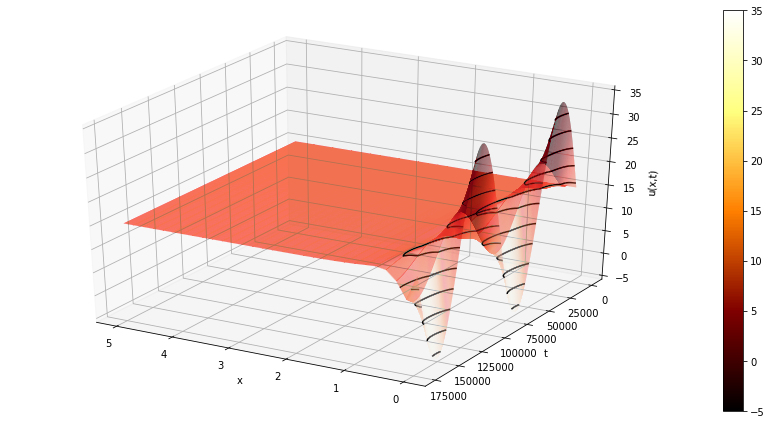

In [33]:
# Definimos parámetros necesarios
# Intervalo de x
xi=0.0
xf=5.0

# Intervalo de t
ti=0.0
tf=172800.0

# Número de pasos de x y t
Nspace = 30
Ntime = 15001

# Distancia entre puntos de x y t
dx=(xf-xi)/(Nspace-1)
dt=(tf-ti)/(Ntime-1)

# Parámetros
kappa = 1e-6
u_0=15.0
u_a=20.0
P=86400.0

# Criterio de convergencia y estabilidad del método
alpha = kappa*dt/dx**2
print('alpha < 0.5 ? ',alpha,'\n')

# Generación de valores de x y t
x=np.linspace(xi,xf,Nspace)
t=np.linspace(ti,tf,Ntime)

# Generamos la matriz de temperatura u
u=np.zeros((Nspace,Ntime))

# Condiciones de la forntera y valores iniciales
u[0,:]=u_0+u_a*np.sin(2*np.pi*t/P)
u[-1,:]=u_0*np.ones(t.shape)
u[:,0]=u_0

# Aplicación del método de diferencias finitas
for k in range(0,Ntime-1):
  for j in range(1,Nspace-1):
    u[j,k+1]=alpha*u[j+1,k]+(1-2*alpha)*u[j,k]+alpha*u[j-1,k]

# Graficación de la solución
T, X = np.meshgrid(t,x)

fig=plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X,T,u,cmap='Reds',rstride=1, cstride=1, alpha=0.5)

ax.contour(X,T,u,10,lw=1,colors='k',linestyles='solid')

# Escala de temperaturas
m=cm.ScalarMappable(cmap='afmhot')
m.set_array(u)
plt.colorbar(m)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x,t)')
ax.view_init(elev=30,azim=120)
plt.tight_layout()
plt.show()